Proszę pobrać zbiór fasion MNIST (torchvision.datasets.FashionMNIST) i zaproponować sieć konwolucyjną do jego klasyfikacji. Dla co najmniej trzech architektur proszę wypisać macierz pomyłek i wykresy funkcji strat podczas uczenia. Proszę spróbować w każdym wypadku podać przynajmniej jeden źle zaklasyfikowany obrazek.

Proszę pamiętać, że zadanie może wymagać odpowiedniego czasu na obliczenia. Nie polecamy wykonywać go na komputerach uczelnianych, tylko wykorzystać zasoby colaba (albo własne, jeśli państwo chcą). Ewentualne przyśpieszenie obliczeń można uzyskać korzystając z GPU w colabie, jeżeli nie dysponują państwo kartą NVidii albo nie chcą jej państwo używać (opisane w zadaniu 2*)

100%|██████████| 26421880/26421880 [00:02<00:00, 11809269.49it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 212277.78it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3734066.06it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5176762.64it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



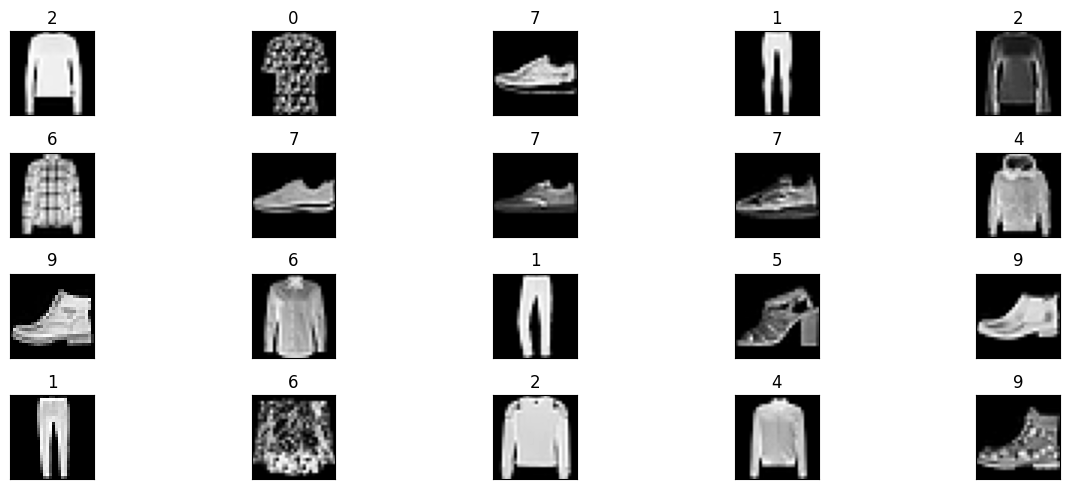

In [ ]:
from torchvision import datasets, transforms
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import torch
import matplotlib.pyplot as plt

transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,),)])

trainset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True,train=True,transform=transform)
testset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True,train=False,transform=transform)

indices=list(range(len(trainset)))
np.random.shuffle(indices)
split=int(np.floor(0.2*len(trainset)))
train_sample=SubsetRandomSampler(indices[:split])
valid_sample=SubsetRandomSampler(indices[split:])

trainloader=torch.utils.data.DataLoader(trainset,sampler=train_sample,batch_size=64)
validloader=torch.utils.data.DataLoader(trainset,sampler=valid_sample,batch_size=64)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

dataiter=iter(trainloader)
images,labels=next(dataiter)

fig=plt.figure(figsize=(15,5))
for idx in np.arange(20):
  ax=fig.add_subplot(4,20//4,idx+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(images[idx]),cmap='gray')
  ax.set_title(labels[idx].item())
  fig.tight_layout()


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class LightNet(nn.Module):
    def __init__(self):
        super(LightNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x




Epoch 1, Loss: 1.0280234658337655
Epoch 2, Loss: 0.6183040928333363
Epoch 3, Loss: 0.5444251985308972
Epoch 4, Loss: 0.49177541805708663
Epoch 5, Loss: 0.4508749693632126
Epoch 6, Loss: 0.4326802572988449
Epoch 7, Loss: 0.4025045573077303
Epoch 8, Loss: 0.3824925701668922
Epoch 9, Loss: 0.36177205199256857
Epoch 10, Loss: 0.3450026733285569
Finished Training
Epoch 1, Loss: 0.5894584909398505
Epoch 2, Loss: 0.3800127015627445
Epoch 3, Loss: 0.3293877770291998
Epoch 4, Loss: 0.2901034033758209
Epoch 5, Loss: 0.2509594608811622
Epoch 6, Loss: 0.22968917244926412
Epoch 7, Loss: 0.20197520119712709
Epoch 8, Loss: 0.17515051832541506
Epoch 9, Loss: 0.15976849043781452
Epoch 10, Loss: 0.14567820266126952
Finished Training
Epoch 1, Loss: 0.993267556137227
Epoch 2, Loss: 0.5738197282907811
Epoch 3, Loss: 0.4923000343619509
Epoch 4, Loss: 0.4259930948944802
Epoch 5, Loss: 0.38175198594306375
Epoch 6, Loss: 0.3529744677721186
Epoch 7, Loss: 0.3194714156871146
Epoch 8, Loss: 0.29329121120749635
Ep

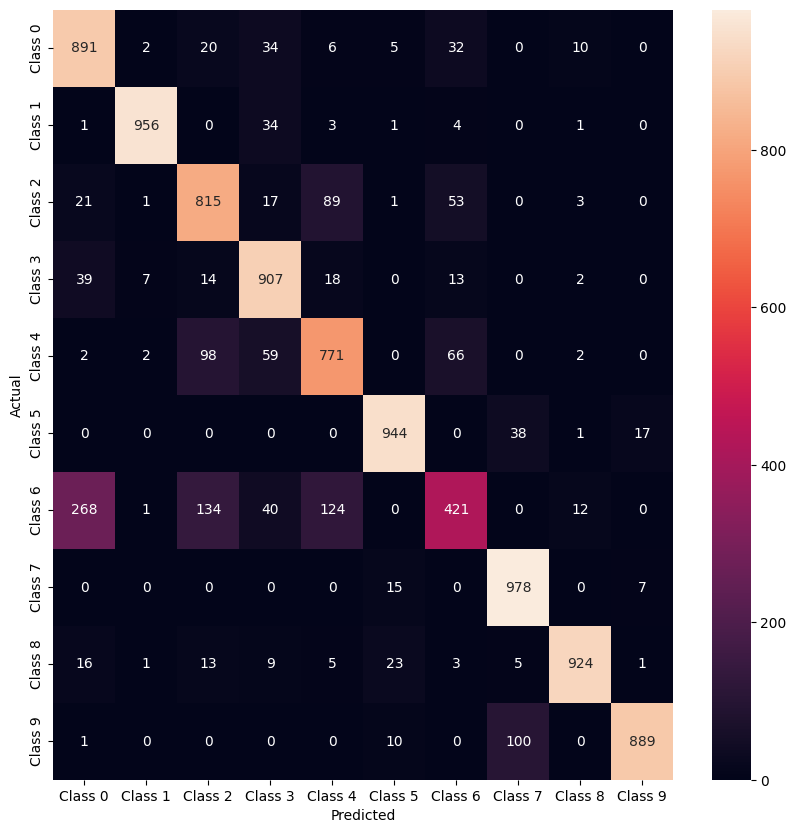

Accuracy: 89.1%


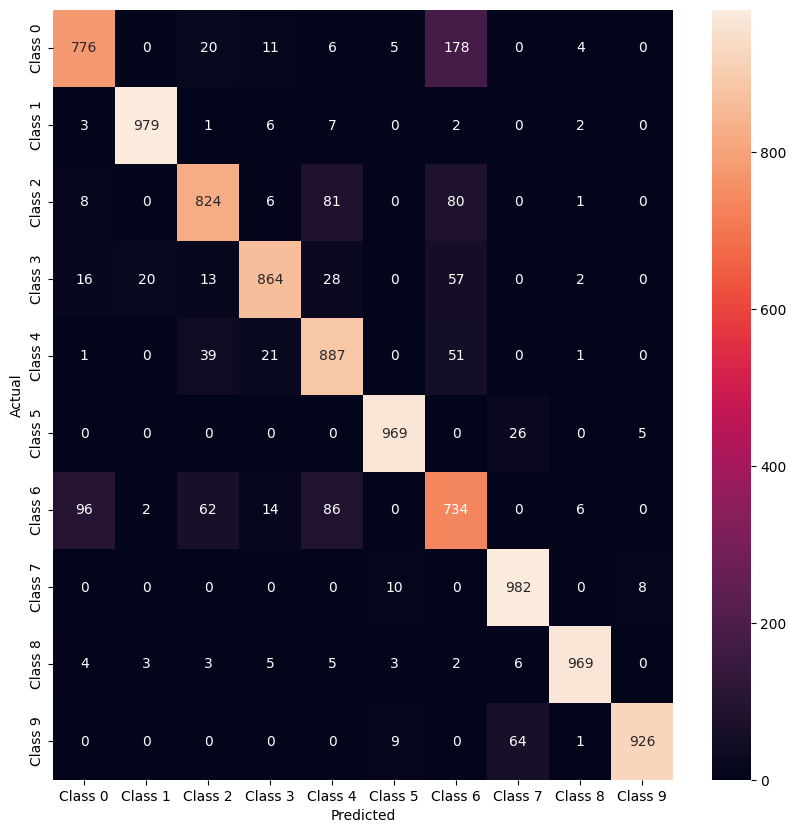

Accuracy: 87.62%


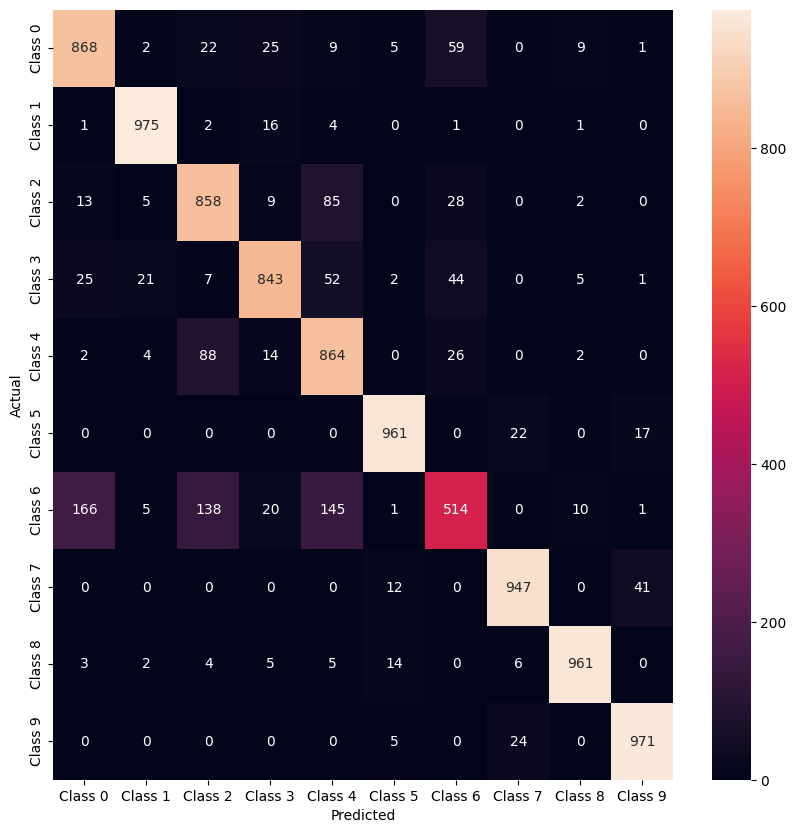

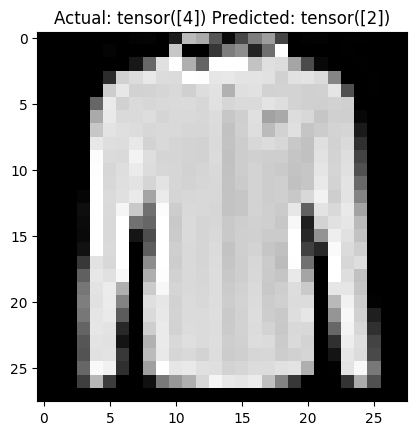

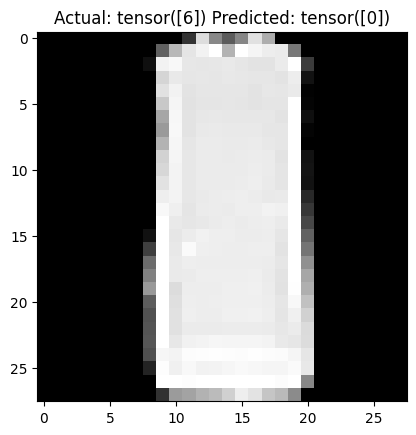

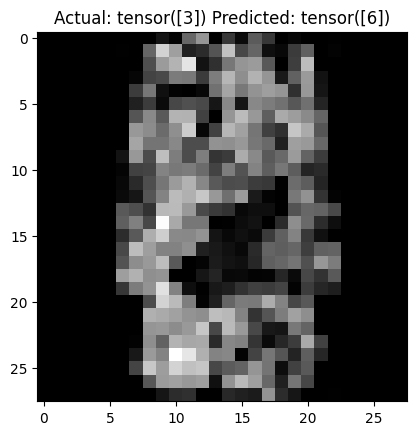

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def train_model(model, trainloader, validloader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}')

    print('Finished Training')

def evaluate_model(model, testloader):
    model.eval()
    total = 0
    correct = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.view(-1).tolist())
            all_labels.extend(labels.view(-1).tolist())

    print(f'Accuracy: {100 * correct / total}%')
    return all_labels, all_preds

def plot_confusion_matrix(labels, preds, classes):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_training_loss(loss_history):
    plt.figure()
    plt.plot(loss_history)
    plt.title('Training Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

def show_misclassified_image(testloader, model):
    model.eval()
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        misclassified_index = (predicted != labels).nonzero()[0]
        plt.imshow(images[misclassified_index].squeeze(), cmap='gray')
        plt.title(f'Actual: {labels[misclassified_index]} Predicted: {predicted[misclassified_index]}')
        plt.show()
        break


net = Net()
light_net = LightNet()
deep_net = DeepNet()

criterion = nn.CrossEntropyLoss()
optimizer_net = optim.Adam(net.parameters(), lr=0.001)
optimizer_light_net = optim.Adam(light_net.parameters(), lr=0.001)
optimizer_deep_net = optim.Adam(deep_net.parameters(), lr=0.001)

train_model(net, trainloader, validloader, criterion, optimizer_net, num_epochs=10)
train_model(light_net, trainloader, validloader, criterion, optimizer_light_net, num_epochs=10)
train_model(deep_net, trainloader, validloader, criterion, optimizer_deep_net, num_epochs=10)

labels, preds = evaluate_model(net, testloader)
plot_confusion_matrix(labels, preds, classes=[f'Class {i}' for i in range(10)])

labels, preds = evaluate_model(light_net, testloader)
plot_confusion_matrix(labels, preds, classes=[f'Class {i}' for i in range(10)])

labels, preds = evaluate_model(deep_net, testloader)
plot_confusion_matrix(labels, preds, classes=[f'Class {i}' for i in range(10)])

show_misclassified_image(testloader, net)
show_misclassified_image(testloader, light_net)
show_misclassified_image(testloader, deep_net)


Wszystkie trzy modele osiągnęły satysfakcjonujące wyniki, z akcentem na model LightNet, który uzyskał najwyższą dokładność (89.1%). To podkreśla znaczenie zastosowania technik regularyzacji i normalizacji wsadowej w poprawie wydajności modelu. Modele wykazały różnice w szybkości konwergencji i końcowej dokładności, co ilustruje wpływ architektury sieci na proces uczenia. Lżejsza sieć (LightNet) szybciej osiągnęła lepszą dokładność niż pozostałe modele, co sugeruje jej wyższą efektywność w tym zadaniu. Użycie dropoutu w modelu LightNet prawdopodobnie pomogło w zapobieganiu przeuczeniu, co skutkowało lepszymi wynikami na zestawie testowym. Mimo, że model DeepNet był bardziej złozóny od LighNet, nie poradził sobie lepiej z klasyfikacją, co oznacza, że mogło w pewnym stopniu dojść do overfittingu. Eksperyment podkreśla, że nie ma jednej "najlepszej" architektury sieci dla wszystkich zadań - należy po prostu eksperymentować